## ---- START ----
#### EDA Case Study - DS - C33 [2021]

## 1. Importing Libraries

In [1]:
#-- Importing libraries --

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Data

In [2]:
#-- Reading the data from local --

app_data=pd.read_csv('/Users/abhidas/Desktop/Data Science/Credit EDA Case Study/application_data.csv')
pre_app_data=pd.read_csv('/Users/abhidas/Desktop/Data Science/Credit EDA Case Study/previous_application.csv')

#app_data - application data
#pre_app_data - previous application

## 3. Inspecting the Dataframes

### 3.1 Inspecting "application_data.csv" data

In [3]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
app_data.shape

(307511, 122)

In [5]:
app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

### 3.2 Inspecting "previous_application.csv" data

In [7]:
pre_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [8]:
pre_app_data.shape

(1670214, 37)

In [9]:
pre_app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
pre_app_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

## 4. Data Cleaning

### 4.1 Finding percentage of null values in "application_data.csv" or app_data

In [11]:
round(app_data.isnull().mean()*100,2).sort_values(ascending = False).head(60)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### 4.2 Remove Null Values from app_data

In [12]:
#-- Removing all columns with more then 45% of null values --

app_data=app_data.loc[:,app_data.isnull().mean()<=0.45]

In [13]:
round(app_data.isnull().mean()*100,2).sort_values(ascending = False).head(8)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
dtype: float64

### 4.3 Impute Missing Values In Columns

#### 4.3.1 OCCUPATION_TYPE imputation

In [14]:
#-- Checking null value count before imputation --

app_data.OCCUPATION_TYPE.isnull().sum()

96391

In [15]:
app_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

We can impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers'

In [16]:
#-- Checking the mode value --

app_data.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [17]:
#-- Filling null/missing values --

app_data.OCCUPATION_TYPE=app_data.OCCUPATION_TYPE.fillna(app_data.OCCUPATION_TYPE.mode()[0])

In [18]:
#-- Checking null value count after imputation --

app_data.OCCUPATION_TYPE.isnull().sum()

0

#### 4.3.2 EXT_SOURCE_3

In [19]:
#-- Checking null value count before imputation --

app_data.EXT_SOURCE_3.isnull().sum()

60965

In [20]:
app_data.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.013948       1
0.014148       1
0.017506       1
0.020455       1
0.028275       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

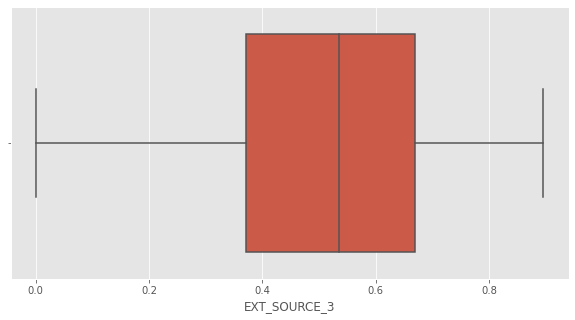

In [21]:
#-- EXT_SOURCE_3 is a continuous variable, so checking for outliers --

plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(app_data['EXT_SOURCE_3'])
plt.show()

We can impute the missing values for the column 'EXT_SOURCE_3' with mean, as ther is no outliers.

In [22]:
#-- Checking the mode value --

app_data.EXT_SOURCE_3.mean()

0.5108529061800121

In [23]:
#-- Filling null/missing values --

app_data.EXT_SOURCE_3=app_data.OCCUPATION_TYPE.fillna(app_data.EXT_SOURCE_3.mean())

In [24]:
#-- Checking null value count after imputation --

app_data.EXT_SOURCE_3.isnull().sum()

0

#### 4.3.3 AMT_REQ_CREDIT_BUREAU_YEAR imputation

In [25]:
#-- Checking null value count before imputation --

app_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [26]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with mode, which is the value 'Laborers'

In [27]:
#-- Checking the mode value --

app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

In [28]:
#-- Filling null/missing values --

app_data.AMT_REQ_CREDIT_BUREAU_YEAR=app_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])

In [29]:
#-- Checking null value count after imputation --

app_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

#### 4.3.4 AMT_REQ_CREDIT_BUREAU_HOUR imputation

In [30]:
#-- Checking null value count before imputation --

app_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [31]:
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_HOUR' with mode, which is '0'.

In [32]:
#-- Checking the mode value --

app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [33]:
#-- Filling null/missing values --

app_data.AMT_REQ_CREDIT_BUREAU_HOUR=app_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])

In [34]:
#-- Checking null value count after imputation --

app_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

#### 4.3.5 AMT_REQ_CREDIT_BUREAU_QRT imputation

In [35]:
#-- Checking null value count before imputation --

app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41519

In [36]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_QRT' with mode,  which is '0'.

In [37]:
#-- Checking the mode value --

app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [38]:
#-- Filling null/missing values --

app_data.AMT_REQ_CREDIT_BUREAU_QRT=app_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])

In [39]:
#-- Checking null value count after imputation --

app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

#### 4.3.6 AMT_REQ_CREDIT_BUREAU_MON imputation

In [40]:
#-- Checking null value count before imputation --

app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

In [41]:
app_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
27.0         1
22.0         1
23.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_MON' with mode, which is '0'.

In [42]:
#-- Checking the mode value --

app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [43]:
#-- Filling null/missing values --

app_data.AMT_REQ_CREDIT_BUREAU_MON=app_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])

In [44]:
#-- Checking null value count after imputation --

app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

#### 4.3.7 AMT_REQ_CREDIT_BUREAU_WEEK imputation

In [45]:
#-- Checking null value count before imputation --

app_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41519

In [46]:
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_WEEK' with mode, which is '0'.

In [47]:
#-- Checking the mode value --

app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [48]:
#-- Filling null/missing values --

app_data.AMT_REQ_CREDIT_BUREAU_WEEK=app_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])

In [49]:
#-- Checking null value count after imputation --

app_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

#### 4.3.8 AMT_REQ_CREDIT_BUREAU_DAY imputation

In [50]:
#-- Checking null value count before imputation --

app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41519

In [51]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_DAY' with mode, which is '0'.

In [52]:
#-- Checking the mode value --

app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [53]:
#-- Filling null/missing values --

app_data.AMT_REQ_CREDIT_BUREAU_DAY=app_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])

In [54]:
#-- Checking null value count after imputation --

app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

### 4.4 Fixing Data type and Data

#### 4.4.1 Fixing values for Days columns

In [55]:
#-- The columns starting with 'DAYS' --
filter_col = [col for col in app_data if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [56]:
print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())
print(app_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [57]:
#-- Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive --
app_data[filter_col]= abs(app_data[filter_col])

In [58]:
print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())
print(app_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


#### 4.4.2 Imputing the value'XNA' which means not available for the column 'ORGANIZATION_TYPE'

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [59]:
#-- Checking count before fixing 'Not Available' value --

app_data.ORGANIZATION_TYPE.value_counts().head(5)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [60]:
app_data.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

Since, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [61]:
#-- Dropping the rows of total 55374 have 'XNA' values in the organization type colum --

app_data=app_data.drop(app_data.loc[app_data.ORGANIZATION_TYPE=='XNA'].index)

In [62]:
#-- Checking count after fixing 'Not Available' value --

app_data.ORGANIZATION_TYPE.value_counts().head(5)

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Name: ORGANIZATION_TYPE, dtype: int64

#### 4.4.3 Imputing the value'XNA' which means not available for the column 'CODE_GENDER'

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [63]:
#-- Checking count before fixing 'Not Available' value --

app_data.CODE_GENDER.value_counts()

F      157177
M       94956
XNA         4
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [64]:
# - Replacing XNA value with F

app_data.loc[app_data.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'

In [65]:
app_data.CODE_GENDER.value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

### 4.5 Binning variables for analysis

#### 4.5.1 Binning AMT_INCOME_TOTAL

In [66]:
app_data.AMT_INCOME_TOTAL.value_counts()

135000.0    30206
112500.0    25161
157500.0    22734
180000.0    21805
225000.0    18460
            ...  
91638.0         1
65884.5         1
107554.5        1
127102.5        1
149400.0        1
Name: AMT_INCOME_TOTAL, Length: 2266, dtype: int64

In [67]:
#-- Binning AMT_INCOME_TOTAL --

app_data['AMT_INCOME_RANGE']=pd.qcut(app_data['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.5,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [68]:
app_data.AMT_INCOME_RANGE.value_counts()

High        67509
Medium      63607
VeryHigh    42614
VeryLow     39502
Low         38905
Name: AMT_INCOME_RANGE, dtype: int64

#### 4.5.2 Binning AMT_CREDIT

In [69]:
app_data.AMT_CREDIT.value_counts()

450000.0     8764
675000.0     7109
180000.0     6850
270000.0     6600
225000.0     6394
             ... 
943123.5        1
1904202.0       1
351090.0        1
553999.5        1
1603170.0       1
Name: AMT_CREDIT, Length: 5331, dtype: int64

In [70]:
#--  Binning AMT_CREDIT --

app_data['AMT_CREDIT_RANGE']=pd.qcut(app_data['AMT_CREDIT'],q=[0,0.1,0.3,0.5,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [71]:
app_data.AMT_CREDIT_RANGE.value_counts()

High        74608
Low         50806
Medium      50349
VeryHigh    50249
VeryLow     26125
Name: AMT_CREDIT_RANGE, dtype: int64

#### 4.5.2 Binning DAYS_BIRTH

In [72]:
app_data.DAYS_BIRTH.value_counts()

13749    43
13481    42
18248    41
10020    41
15771    40
         ..
24515     1
24082     1
24445     1
24131     1
7868      1
Name: DAYS_BIRTH, Length: 16513, dtype: int64

In [73]:
#-- Converting 'DAYS_BIRTH' to years --

app_data['DAYS_BIRTH']= (app_data['DAYS_BIRTH']/365).astype(int)

In [74]:
app_data['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 39, 27, 36, 38, 23, 35, 26, 48, 31, 50,
       40, 30, 43, 28, 41, 32, 33, 47, 57, 44, 21, 55, 49, 56, 53, 42, 29,
       64, 62, 59, 34, 63, 22, 24, 58, 60, 61, 65, 67, 68, 66, 69, 20])

In [75]:
#-- Binning DAYS_BIRTH --

app_data['DAYS_BIRTH_BINS']=pd.cut(app_data['DAYS_BIRTH'], bins=[18,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [76]:
app_data.DAYS_BIRTH_BINS.value_counts()

Middle_Age        155746
Young              75643
Very_Young         16267
Senior_Citizen      4481
Name: DAYS_BIRTH_BINS, dtype: int64

### 4.6 Finding percentage of null values in "previous_application.csv" or pre_app_data

In [77]:
round(pre_app_data.isnull().mean()*100,2).sort_values(ascending = False).head(60)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

### 4.7 Remove Null Values from pre_app_data

In [78]:
#-- Removing all columns with more then 45% of null values --

pre_app_data=pre_app_data.loc[:,pre_app_data.isnull().mean()<=0.45]

In [79]:
round(pre_app_data.isnull().mean()*100,2).sort_values(ascending = False).head(10)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_LAST_DUE                40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
dtype: float64

### 4.8 Fixing Data type and Data for pre_app_data

#### 4.8.1 Fixing values for Days columns

In [80]:
#-- The columns starting with 'DAYS' --
filter_col = [col for col in pre_app_data if col.startswith('DAYS')]
filter_col

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [81]:
#-- Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive --

pre_app_data[filter_col]= abs(pre_app_data[filter_col])

#### 4.8.2 Replacing XNA and XAP by NaN

In [82]:
pre_app_data=pre_app_data.replace('XNA', np.NaN)
pre_app_data=pre_app_data.replace('XAP', np.NaN)

## 5. Analysis

Analysis for application_data.csx / app_data

### 5.1 Checking Imbalance Target

In [83]:
app_data.TARGET.value_counts(normalize=True)*100

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

In [84]:
plt.pie(app_data['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

We see that the imbalance is high between target variables and its clear that there is an imbalance between people who defaulted and who didn't default. More than 91% of people didn't default as opposed to 9% who defaulted.

### 5.2 Splitting the dataframe into two different satasets based on 'Target' value

In [85]:
# Dataframe with all the data related to non-defaulters
app_data_0=app_data[app_data.TARGET == 0]

# Dataframe with all the data related to defaulters
app_data_1=app_data[app_data.TARGET == 1]

### 5.3 Univariate Analysis

#### 5.3.1 Gender Distribution

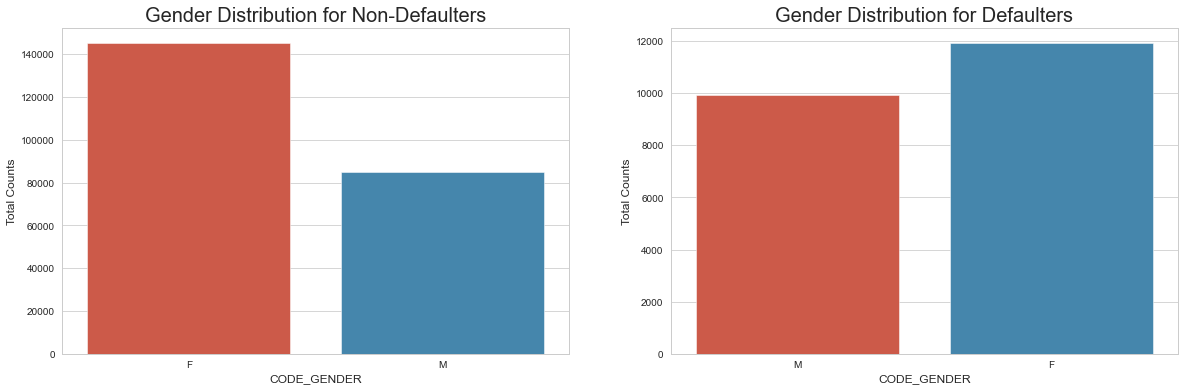

In [86]:
#-- Gender Distribution for both Non-Defaulters and Defaulters --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
sns.countplot(x='CODE_GENDER', data=app_data_0,ax=ax1)
ax1.set_ylabel('Total Counts')
ax1.set_title(f'Gender Distribution for Non-Defaulters',fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels())
      
sns.countplot(x='CODE_GENDER', data=app_data_1,ax=ax2)
ax2.set_ylabel('Total Counts')
ax2.set_title(f'Gender Distribution for Defaulters',fontsize=20)    
ax2.set_xticklabels(ax2.get_xticklabels())

plt.show()

We see more female applying for loans than males and hence the more number of female defaulters as well. But the rate of defaulting of FEMALE is much lower compared to their MALE counterparts.

#### 5.3.2 Income Source

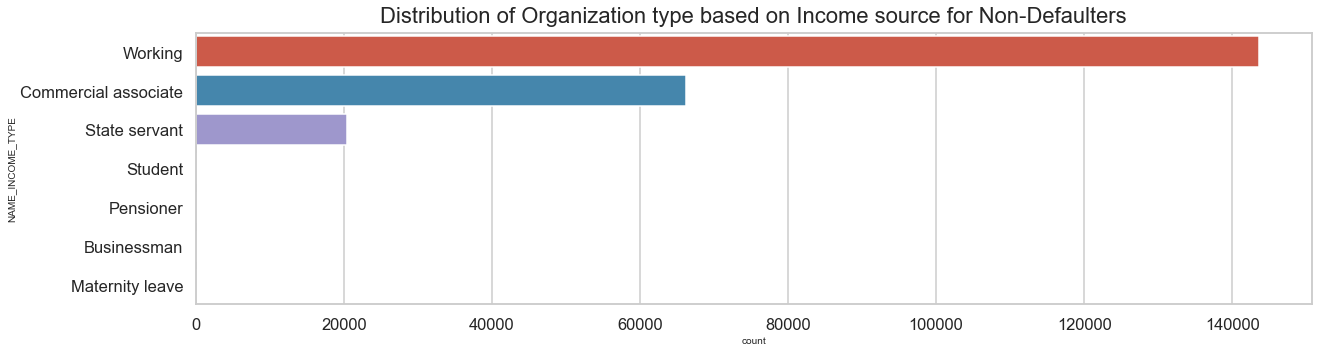

In [87]:
#-- Income source of Loan payment for Non-Defaulters --

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,5))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 10
plt.title("Distribution of Organization type based on Income source for Non-Defaulters")
sns.countplot(data=app_data_0,y='NAME_INCOME_TYPE',order=app_data_0['NAME_INCOME_TYPE'].value_counts().index)
plt.show()

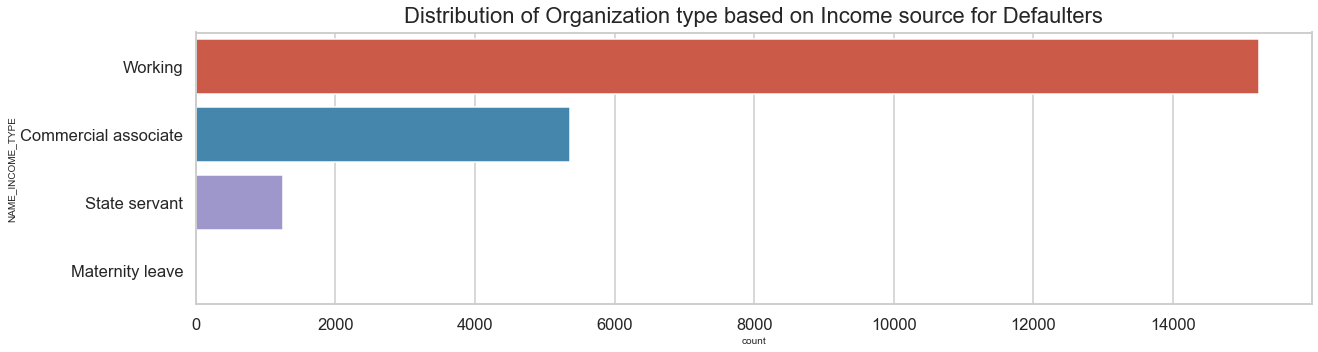

In [88]:
#-- Income source of Loan payment for Defaulters --

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,5))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 10
plt.title("Distribution of Organization type based on Income source for Defaulters")
sns.countplot(data=app_data_1,y='NAME_INCOME_TYPE',order=app_data_1['NAME_INCOME_TYPE'].value_counts().index)
plt.show()

For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher where as credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’ are less.

#### 5.3.3 Income Range

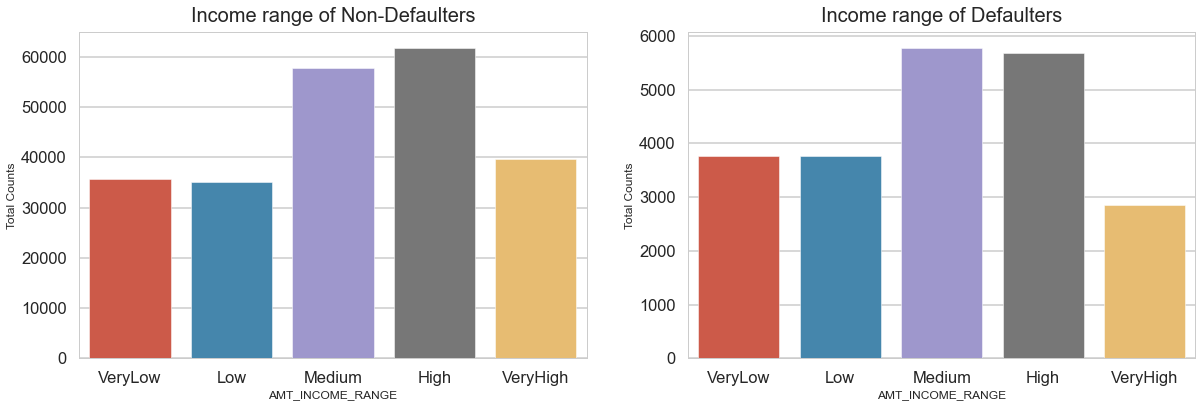

In [89]:
#-- Income Range for both Non-Defaulters and Defaulters --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
sns.countplot(x='AMT_INCOME_RANGE', data=app_data_0,ax=ax1)
ax1.set_ylabel('Total Counts')
ax1.set_title(f'Income range of Non-Defaulters',fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels())
      
sns.countplot(x='AMT_INCOME_RANGE', data=app_data_1,ax=ax2)
ax2.set_ylabel('Total Counts')
ax2.set_title(f'Income range of Defaulters',fontsize=20)    
ax2.set_xticklabels(ax2.get_xticklabels())

plt.show()

The Very High income group tend to default less often when compared to other income group.

#### 5.3.4 Housing

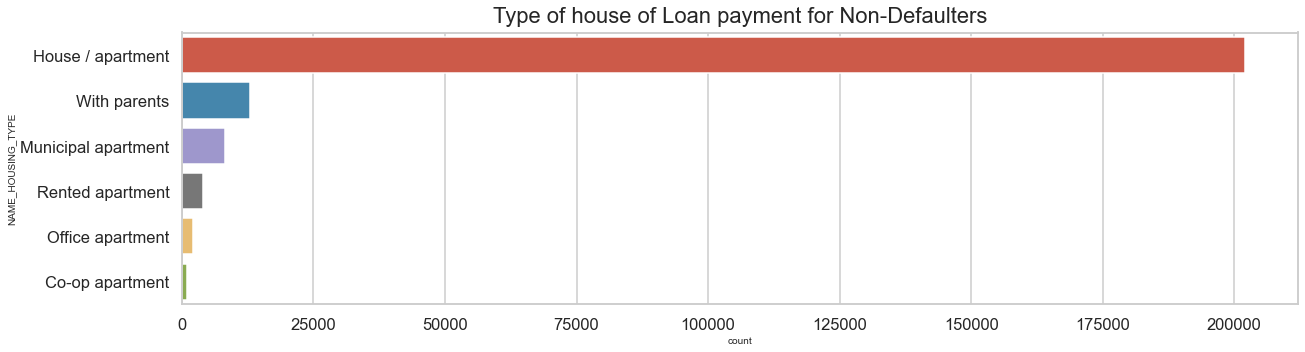

In [90]:
#-- Type of house of Loan payment for Non-Defaulters --

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,5))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 10
plt.title("Type of house of Loan payment for Non-Defaulters")
sns.countplot(data=app_data_0,y='NAME_HOUSING_TYPE',order=app_data_0['NAME_HOUSING_TYPE'].value_counts().index)
plt.show()

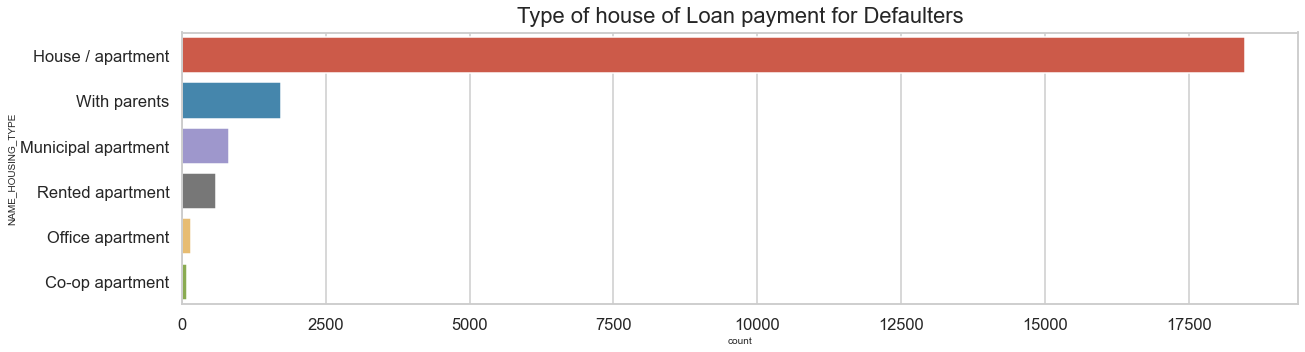

In [91]:
#-- Type of house of Loan payment for Defaulters --

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,5))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 10
plt.title("Type of house of Loan payment for Defaulters")
sns.countplot(data=app_data_1,y='NAME_HOUSING_TYPE',order=app_data_1['NAME_HOUSING_TYPE'].value_counts().index)
plt.show()

It is clear from the graph that people who have House/Appartment, tend to apply for more loans.

#### 5.3.5 Family Status

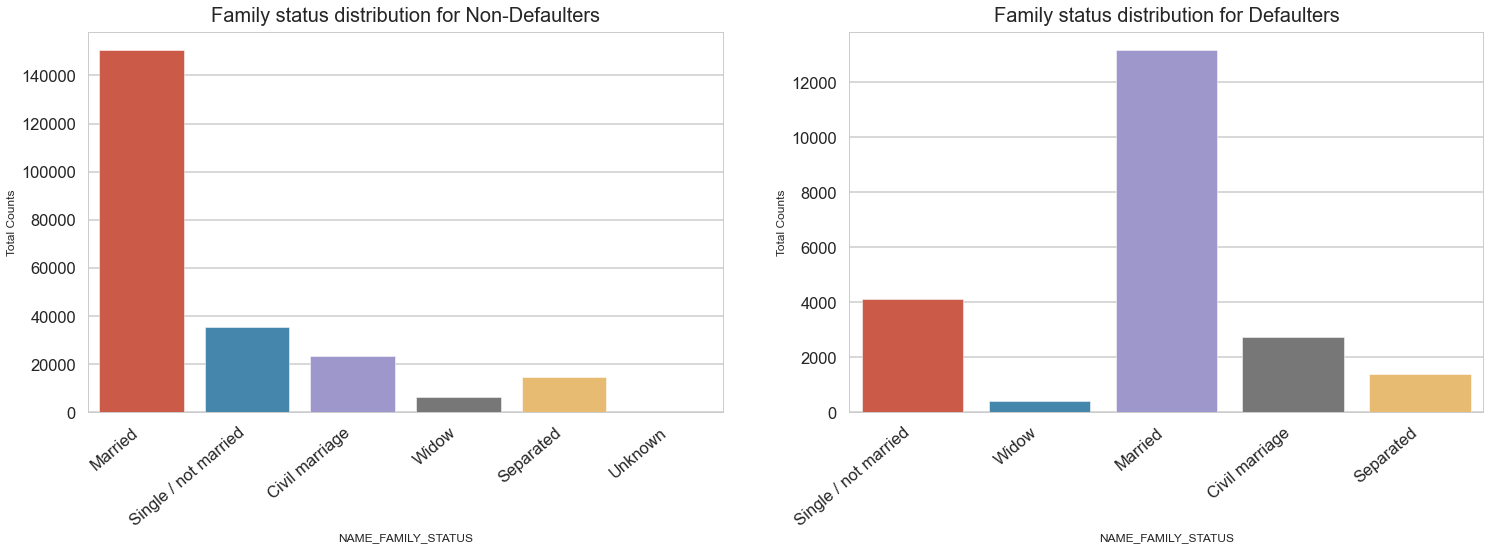

In [92]:
#-- Family Status for both Non-Defaulters and Defaulters --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
    
sns.countplot(x='NAME_FAMILY_STATUS', data=app_data_0,ax=ax1)
ax1.set_ylabel('Total Counts')
ax1.set_title(f'Family status distribution for Non-Defaulters',fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
      
sns.countplot(x='NAME_FAMILY_STATUS', data=app_data_1,ax=ax2)
ax2.set_ylabel('Total Counts')
ax2.set_title(f'Family status distribution for Defaulters',fontsize=20)    
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

plt.show()

Married people tend to apply for more loans. Singles are the second highest.

#### 5.3.6 Education

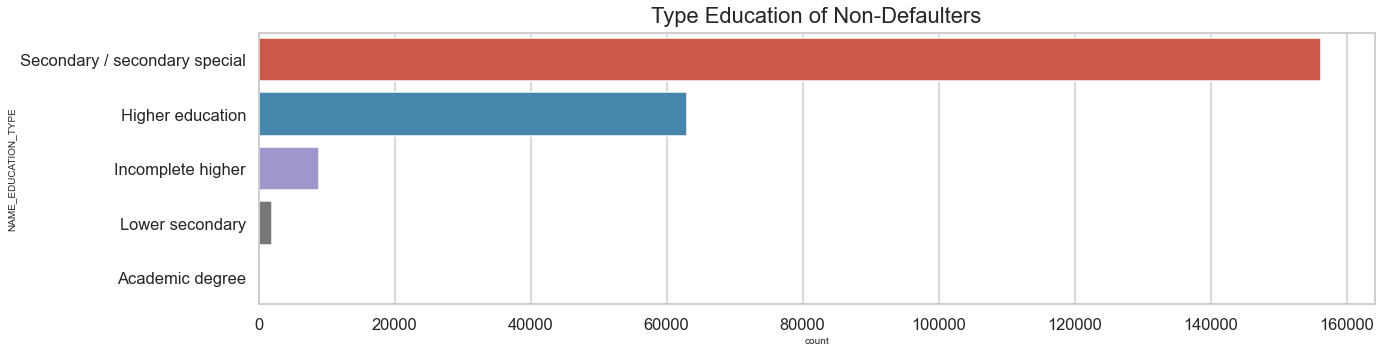

In [93]:
#-- Type Education of Non-Defaulters --

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,5))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 10
plt.title("Type Education of Non-Defaulters")
sns.countplot(data=app_data_0,y='NAME_EDUCATION_TYPE',order=app_data_0['NAME_EDUCATION_TYPE'].value_counts().index)
plt.show()

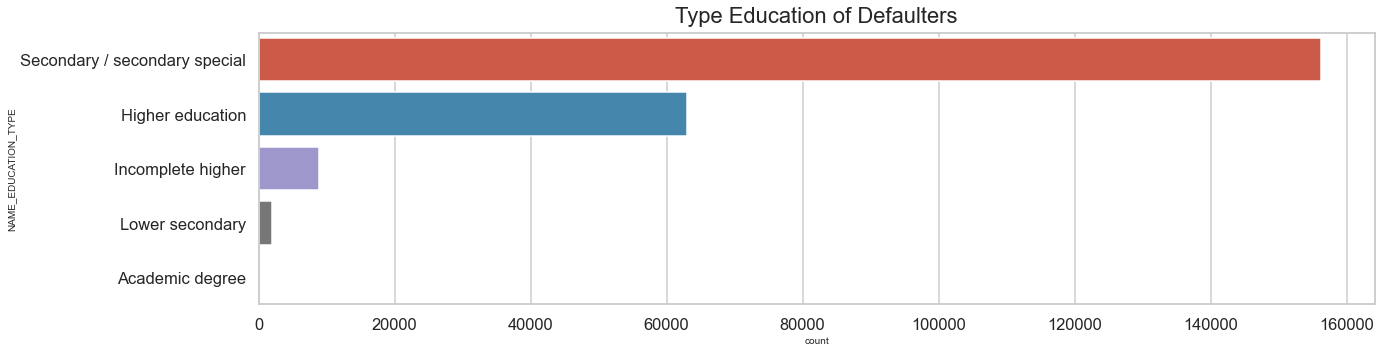

In [94]:
#-- Type Education of Defaulters --

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,5))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 10
plt.title("Type Education of Defaulters")
sns.countplot(data=app_data_0,y='NAME_EDUCATION_TYPE',order=app_data_0['NAME_EDUCATION_TYPE'].value_counts().index)
plt.show()

Almost all of the Education categories are equally likely to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default

#### 5.3.7 Age Group

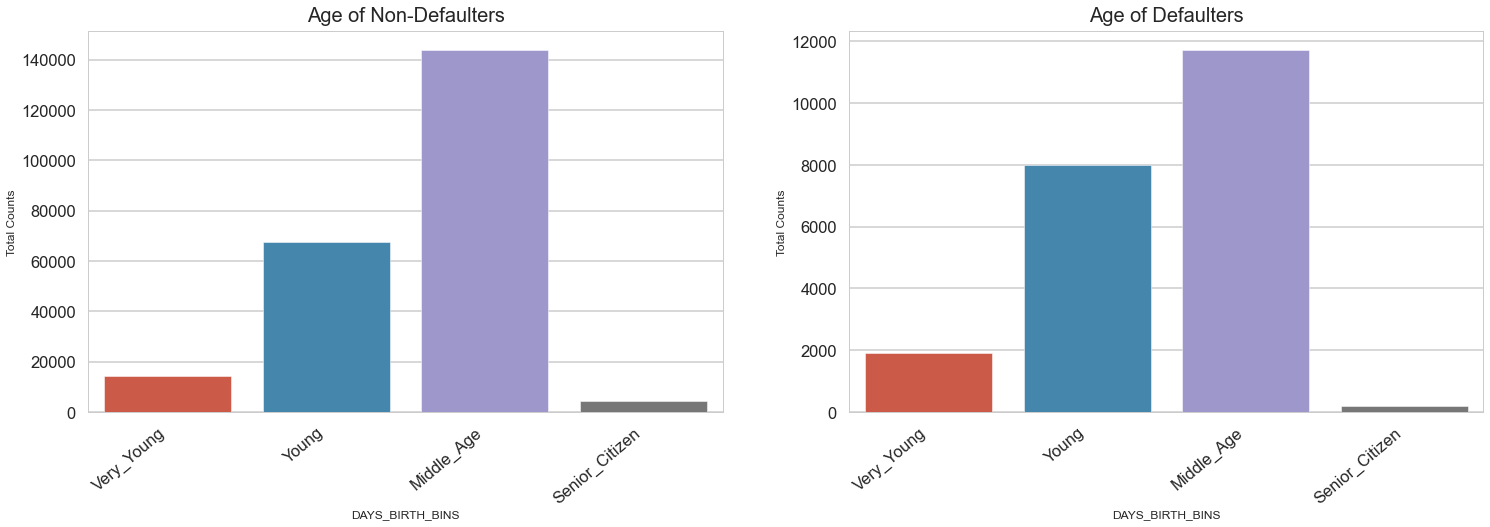

In [95]:
#-- Age group for both Non-Defaulters and Defaulters --

plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.despine
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
    
sns.countplot(x='DAYS_BIRTH_BINS', data=app_data_0,ax=ax1)
ax1.set_ylabel('Total Counts')
ax1.set_title(f'Age of Non-Defaulters',fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
      
sns.countplot(x='DAYS_BIRTH_BINS', data=app_data_1,ax=ax2)
ax2.set_ylabel('Total Counts')
ax2.set_title(f'Age of Defaulters',fontsize=20)    
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

plt.show()

Very Young people and Senior Citizen take very less loan.

#### 5.3.8 Organization Type

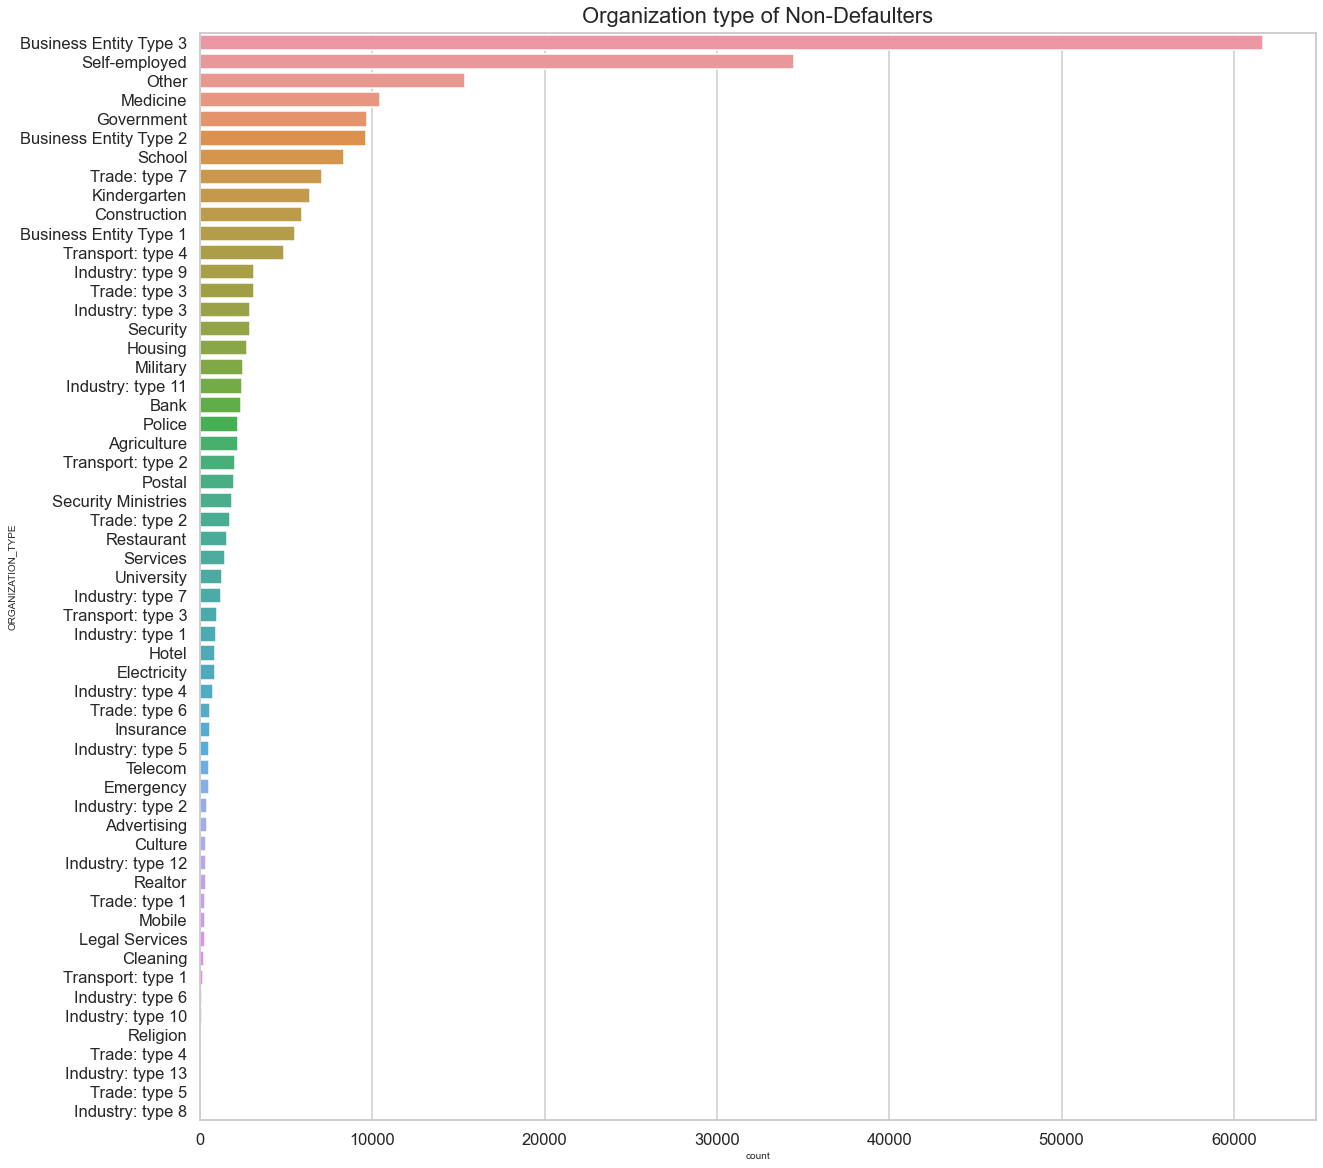

In [96]:
#-- Organization type of Non-Defaulters --

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 10
plt.title("Organization type of Non-Defaulters")
sns.countplot(data=app_data_0,y='ORGANIZATION_TYPE',order=app_data_0['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

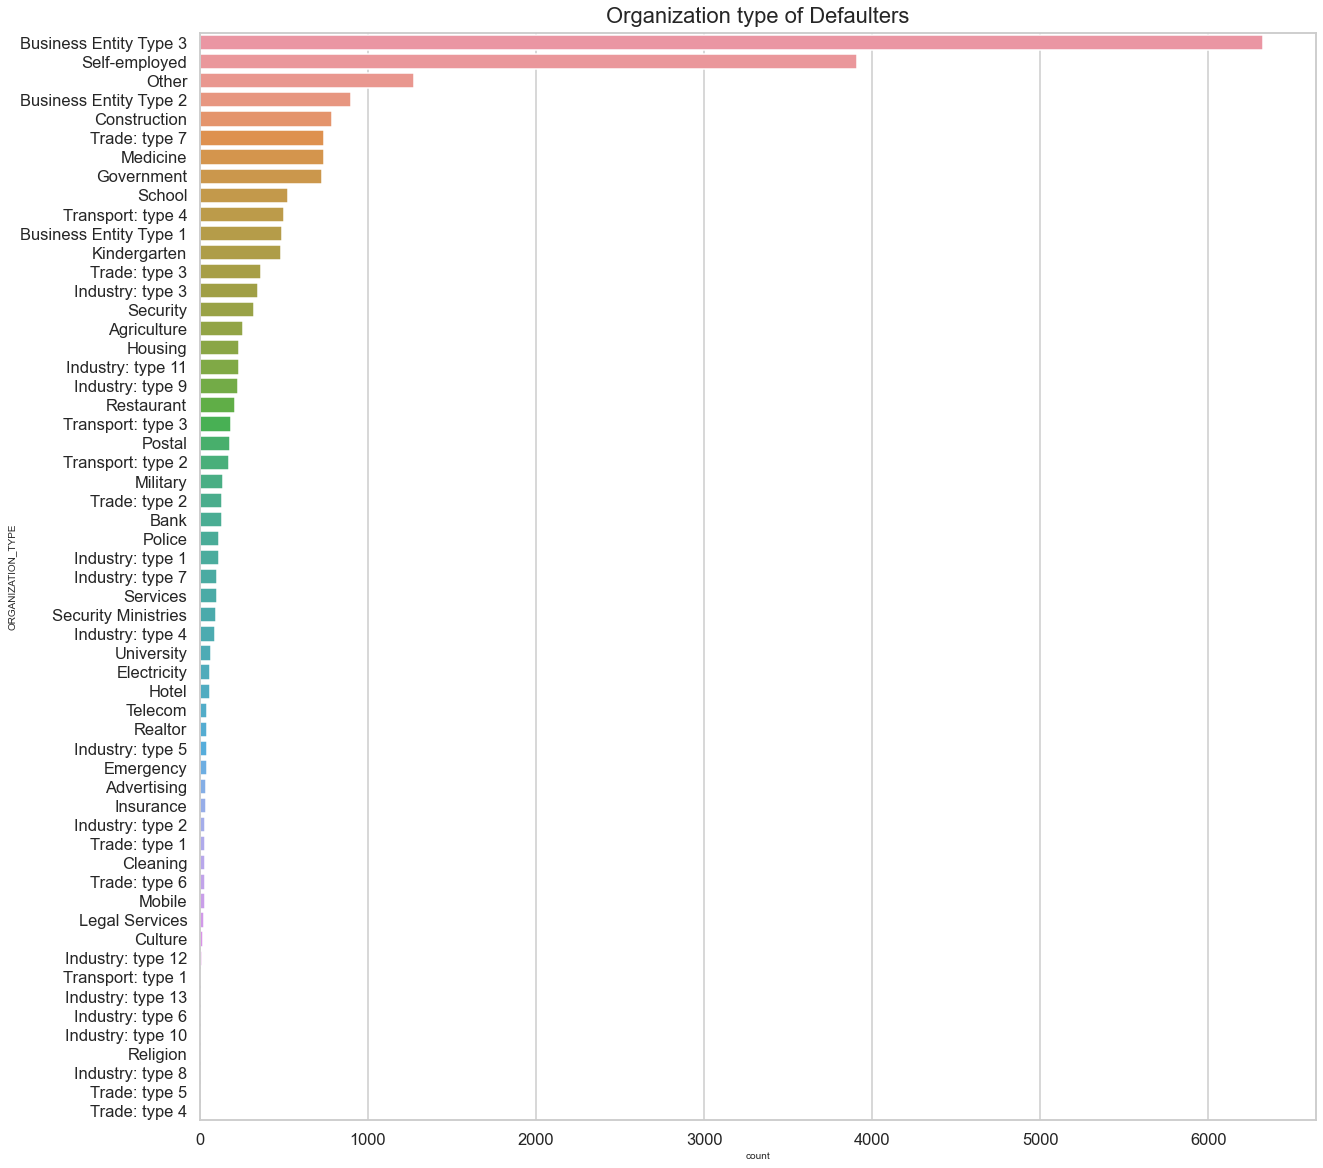

In [97]:
#-- Organization type of Defaulters --

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 10
plt.title("Organization type of Defaulters")
sns.countplot(data=app_data_1,y='ORGANIZATION_TYPE',order=app_data_1['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

We do not see any major difference here.

#### 5.3.9 Accompanyed By

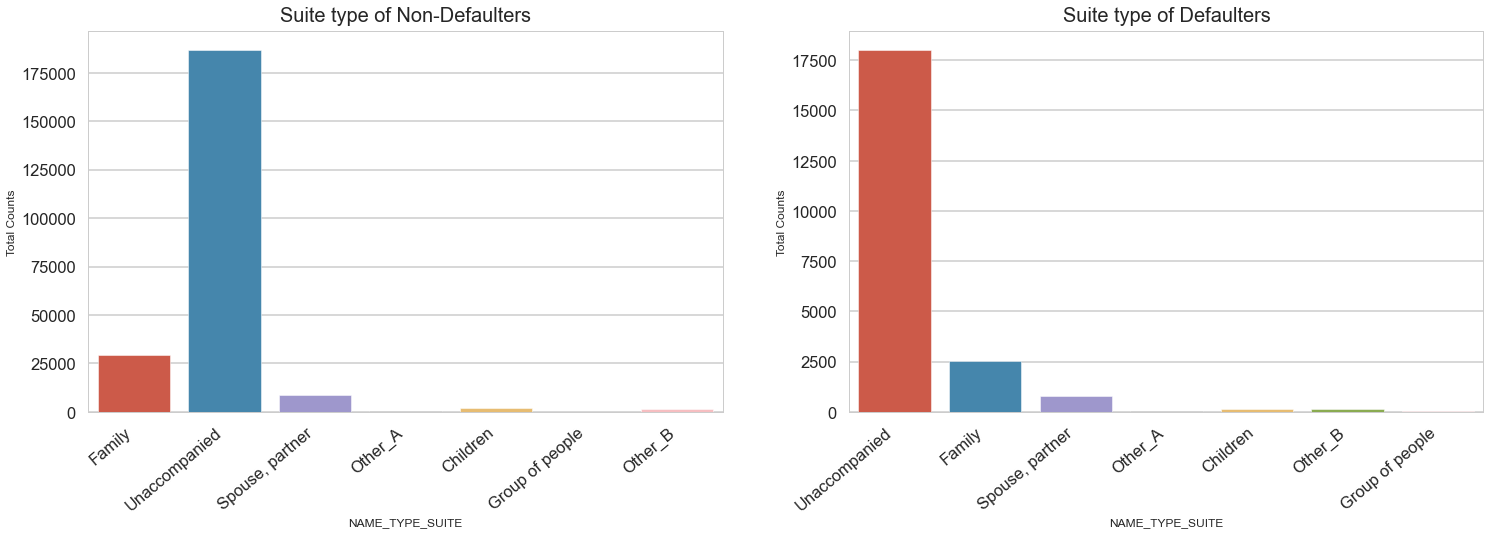

In [98]:
#-- Accompanyed By for both Non-Defaulters and Defaulters --

plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.despine
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
    
sns.countplot(x='NAME_TYPE_SUITE', data=app_data_0,ax=ax1)
ax1.set_ylabel('Total Counts')
ax1.set_title(f'Suite type of Non-Defaulters',fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
      
sns.countplot(x='NAME_TYPE_SUITE', data=app_data_1,ax=ax2)
ax2.set_ylabel('Total Counts')
ax2.set_title(f'Suite type of Defaulters',fontsize=20)    
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

plt.show()

We do not see any difference.

#### 5.3.10 Family Member

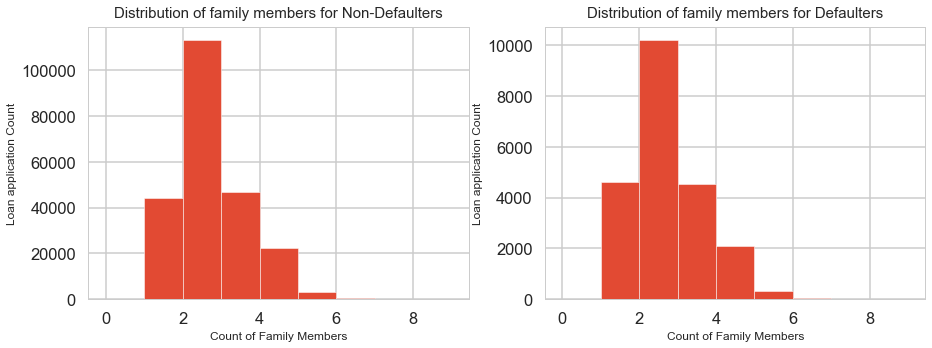

In [99]:
#-- Family members count for both Non-Defaulters and Defaulters --

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
app_data_0['CNT_FAM_MEMBERS'].plot.hist(bins=range(10))
plt.title('Distribution of family members for Non-Defaulters',fontsize=15)
plt.xlabel('Count of Family Members')
plt.ylabel('Loan application Count')

plt.subplot(1, 2, 2)
app_data_1['CNT_FAM_MEMBERS'].plot.hist(bins=range(10))
plt.title(f'Distribution of family members for Defaulters',fontsize=15)
plt.xlabel('Count of Family Members')
plt.ylabel('Loan application Count') 

plt.show()

From the graph we can see that a family of 3 applies loan more often than the other families.

### 5.4 Bivariate Analysis of numerical variables vs categorical

#### 5.4.1 Analysis of AMT_CREDIT vs NAME_EDUCATION_TYPE

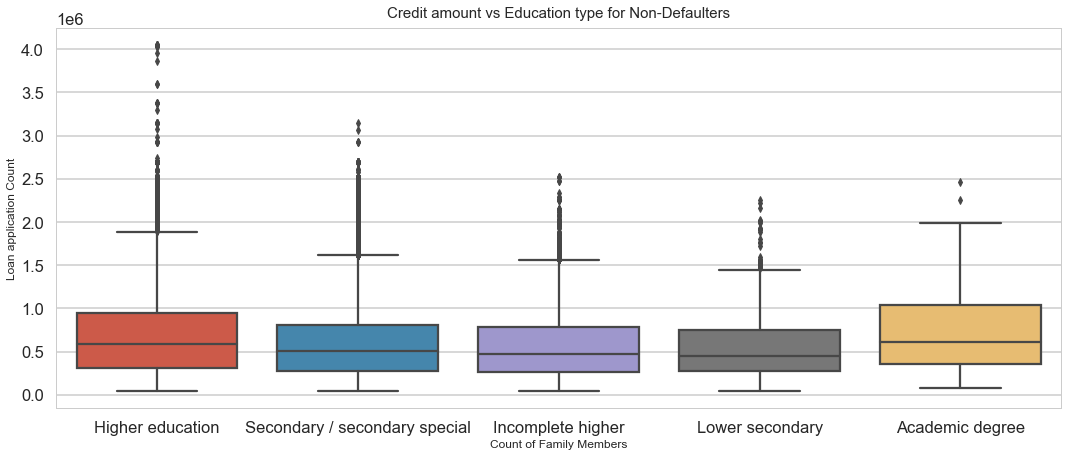

In [100]:
plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
plt.subplots(figsize=(18,7))
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = app_data_0)
plt.title('Credit amount vs Education type for Non-Defaulters',fontsize=15)
plt.xlabel('Count of Family Members')
plt.ylabel('Loan application Count')

plt.show()

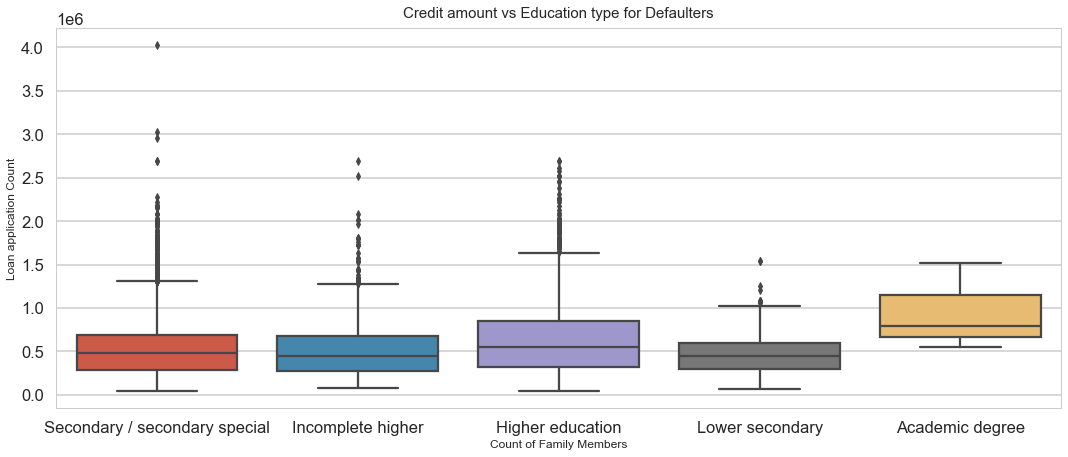

In [101]:
plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
plt.subplots(figsize=(18,7))
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = app_data_1)
plt.title('Credit amount vs Education type for Defaulters',fontsize=15)
plt.xlabel('Count of Family Members')
plt.ylabel('Loan application Count')

plt.show()

Most of the outliers are from Education type 'Higher education' and 'Secondary'.

#### 5.4.2 Analysis of AMT_CREDIT vs NAME_EDUCATION_TYPE

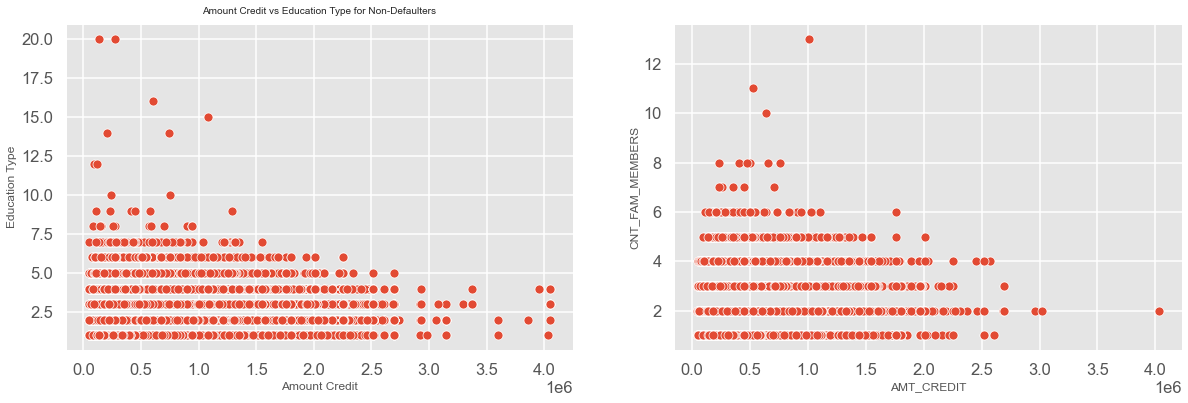

In [102]:
plt.style.use('ggplot')
sns.despine
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',data=app_data_0,ax=ax1)
ax1.set_xlabel('Amount Credit')    
ax1.set_ylabel('Education Type')
ax1.set_title(f'Amount Credit vs Education Type for Non-Defaulters',fontsize=10)
    
sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',data=app_data_1,ax=ax2)
ax1.set_xlabel('Amount Credit')    
ax1.set_ylabel('Education Type')
ax1.set_title(f'Amount Credit vs Education Type for Non-Defaulters',fontsize=10)
            
plt.show()

We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often

#### 5.4.3 Correlation for numerical columns for both Non-Defaulters and Defaulters

In [103]:
app_data_0=app_data_0.iloc[0:,2:].corr(method = 'spearman')
app_data_1=app_data_1.iloc[0:,2:].corr(method = 'spearman')


In [104]:
app_data_0.head(10)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                    1.000000         -0.021950   -0.023652   
AMT_INCOME_TOTAL               -0.021950          1.000000    0.403876   
AMT_CREDIT                     -0.023652          0.403876    1.000000   
AMT_ANNUITY                    -0.010799          0.472217    0.826706   
AMT_GOODS_PRICE                -0.027086          0.408533    0.985074   
REGION_POPULATION_RELATIVE     -0.030579          0.110074    0.060706   
DAYS_BIRTH                     -0.266494          0.054703    0.168940   
DAYS_EMPLOYED                  -0.030948          0.060868    0.104251   
DAYS_REGISTRATION              -0.155518         -0.040559    0.015318   
DAYS_ID_PUBLISH                 0.119164          0.036702    0.038197   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                  -0.010799        -0.027086   
AMT_INCOME_TOTAL               0.472217         0.408533   
AMT_CREDIT                     0.826706         0.985074   
AMT_ANNUITY                    1.000000         0.824348   
AMT_GOODS_PRICE                0.824348         1.000000   
REGION_POPULATION_RELATIVE     0.064333         0.069899   
DAYS_BIRTH                     0.100215         0.168917   
DAYS_EMPLOYED                  0.074646         0.109327   
DAYS_REGISTRATION             -0.010712         0.014986   
DAYS_ID_PUBLISH                0.027355         0.039785   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                 -0.030579   -0.266494   
AMT_INCOME_TOTAL                              0.110074    0.054703   
AMT_CREDIT                                    0.060706    0.168940   
AMT_ANNUITY                                   0.064333    0.100215   
AMT_GOODS_PRICE                               0.069899    0.168917   
REGION_POPULATION_RELATIVE                    1.000000    0.041788   
DAYS_BIRTH                                    0.041788    1.000000   
DAYS_EMPLOYED                                -0.000900    0.307521   
DAYS_REGISTRATION                             0.042400    0.265266   
DAYS_ID_PUBLISH                               0.010299    0.082676   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
CNT_CHILDREN                    -0.030948          -0.155518         0.119164   
AMT_INCOME_TOTAL                 0.060868          -0.040559         0.036702   
AMT_CREDIT                       0.104251           0.015318         0.038197   
AMT_ANNUITY                      0.074646          -0.010712         0.027355   
AMT_GOODS_PRICE                  0.109327           0.014986         0.039785   
REGION_POPULATION_RELATIVE      -0.000900           0.042400         0.010299   
DAYS_BIRTH                       0.307521           0.265266         0.082676   
DAYS_EMPLOYED                    1.000000           0.126708         0.106823   
DAYS_REGISTRATION                0.126708           1.000000         0.036788   
DAYS_ID_PUBLISH                  0.106823           0.036788         1.000000   

                            ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
CNT_CHILDREN                ...         -0.005380         -0.001771   
AMT_INCOME_TOTAL            ...         -0.006778          0.007115   
AMT_CREDIT                  ...          0.022033          0.017149   
AMT_ANNUITY                 ...         -0.024663          0.002826   
AMT_GOODS_PRICE             ...          0.018446          0.015877   
REGION_POPULATION_RELATIVE  ...          0.012313          0.001298   
DAYS_BIRTH                  ...         -0.028565          0.003743   
DAYS_EMPLOYED               ...         -0.018209         -0.000703   
DAYS_REGISTRATION           ...         -0.010656         -0.004077   
DAYS_ID_PUBLISH             ...         -0.004150          0.001438   

                            FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
CNT_CHILDREN                       -0.000

In [105]:
app_data_1.head(10)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                    1.000000         -0.039123    0.000427   
AMT_INCOME_TOTAL               -0.039123          1.000000    0.364559   
AMT_CREDIT                      0.000427          0.364559    1.000000   
AMT_ANNUITY                     0.015133          0.428947    0.812093   
AMT_GOODS_PRICE                -0.005807          0.369419    0.976307   
REGION_POPULATION_RELATIVE     -0.029682          0.058005    0.043545   
DAYS_BIRTH                     -0.174903          0.102866    0.200323   
DAYS_EMPLOYED                  -0.006823          0.053798    0.107605   
DAYS_REGISTRATION              -0.110854         -0.011378    0.021973   
DAYS_ID_PUBLISH                 0.091042          0.051113    0.065143   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   0.015133        -0.005807   
AMT_INCOME_TOTAL               0.428947         0.369419   
AMT_CREDIT                     0.812093         0.976307   
AMT_ANNUITY                    1.000000         0.806543   
AMT_GOODS_PRICE                0.806543         1.000000   
REGION_POPULATION_RELATIVE     0.028666         0.058424   
DAYS_BIRTH                     0.099817         0.198590   
DAYS_EMPLOYED                  0.060193         0.116050   
DAYS_REGISTRATION             -0.019762         0.023020   
DAYS_ID_PUBLISH                0.044128         0.069227   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                 -0.029682   -0.174903   
AMT_INCOME_TOTAL                              0.058005    0.102866   
AMT_CREDIT                                    0.043545    0.200323   
AMT_ANNUITY                                   0.028666    0.099817   
AMT_GOODS_PRICE                               0.058424    0.198590   
REGION_POPULATION_RELATIVE                    1.000000    0.044180   
DAYS_BIRTH                                    0.044180    1.000000   
DAYS_EMPLOYED                                 0.015246    0.256304   
DAYS_REGISTRATION                             0.033490    0.192295   
DAYS_ID_PUBLISH                               0.017779    0.145415   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
CNT_CHILDREN                    -0.006823          -0.110854         0.091042   
AMT_INCOME_TOTAL                 0.053798          -0.011378         0.051113   
AMT_CREDIT                       0.107605           0.021973         0.065143   
AMT_ANNUITY                      0.060193          -0.019762         0.044128   
AMT_GOODS_PRICE                  0.116050           0.023020         0.069227   
REGION_POPULATION_RELATIVE       0.015246           0.033490         0.017779   
DAYS_BIRTH                       0.256304           0.192295         0.145415   
DAYS_EMPLOYED                    1.000000           0.086286         0.104244   
DAYS_REGISTRATION                0.086286           1.000000         0.061563   
DAYS_ID_PUBLISH                  0.104244           0.061563         1.000000   

                            ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
CNT_CHILDREN                ...          0.001282         -0.004365   
AMT_INCOME_TOTAL            ...         -0.025381          0.000446   
AMT_CREDIT                  ...          0.004294          0.007214   
AMT_ANNUITY                 ...         -0.044801         -0.004318   
AMT_GOODS_PRICE             ...         -0.000399          0.006382   
REGION_POPULATION_RELATIVE  ...          0.010512         -0.000474   
DAYS_BIRTH                  ...         -0.017995          0.005033   
DAYS_EMPLOYED               ...         -0.019939         -0.011928   
DAYS_REGISTRATION           ...         -0.003141         -0.001111   
DAYS_ID_PUBLISH             ...         -0.004144          0.011209   

                            FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
CNT_CHILDREN                       -0.001

In [106]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70

sns.heatmap(app_data_0, cmap="Blues",annot=False, linewidths=.2)
plt.title('Correlation for Non-Defaulters')
plt.show()

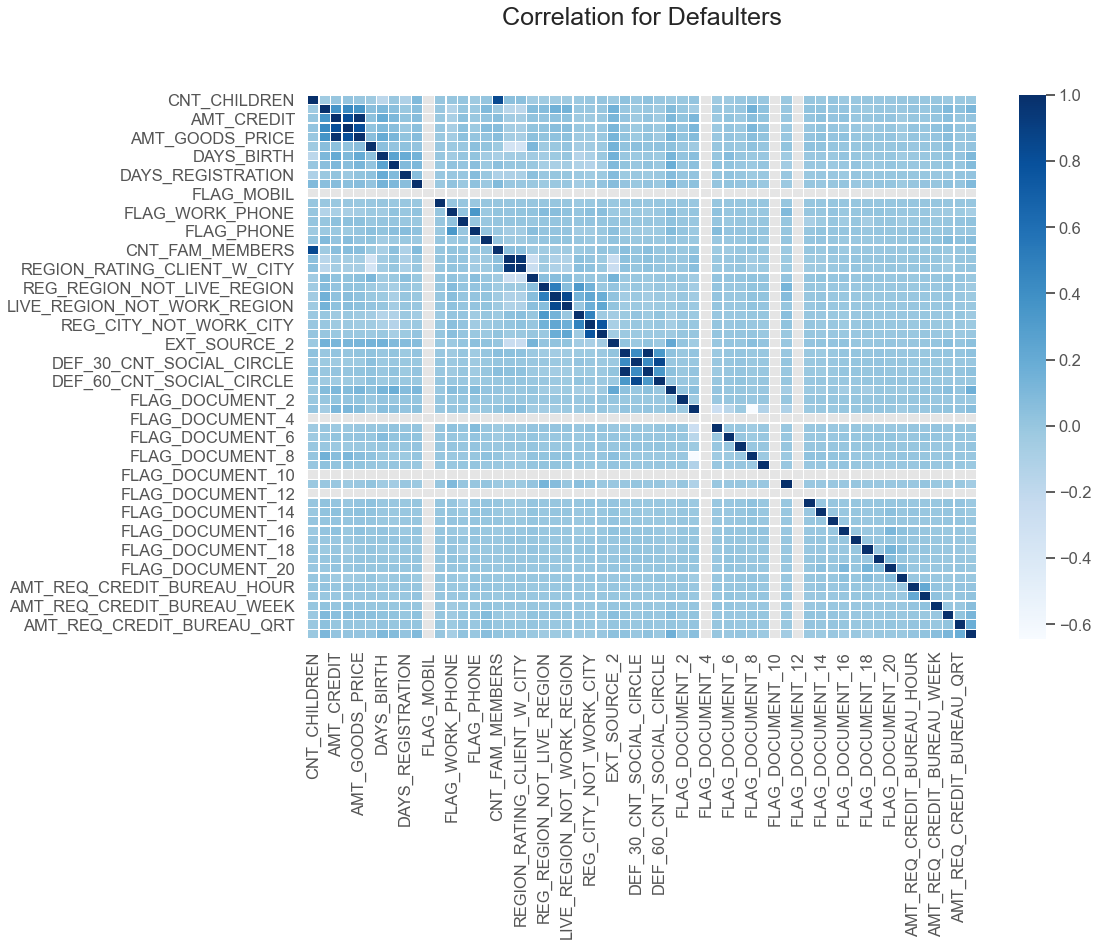

In [107]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70

sns.heatmap(app_data_1, cmap="Blues",annot=False, linewidths=.2)
plt.title('Correlation for Defaulters')
plt.show()

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.

### 5.5 Bivariate Analysis of numerical vs numerical variables

<Figure size 1440x576 with 0 Axes>

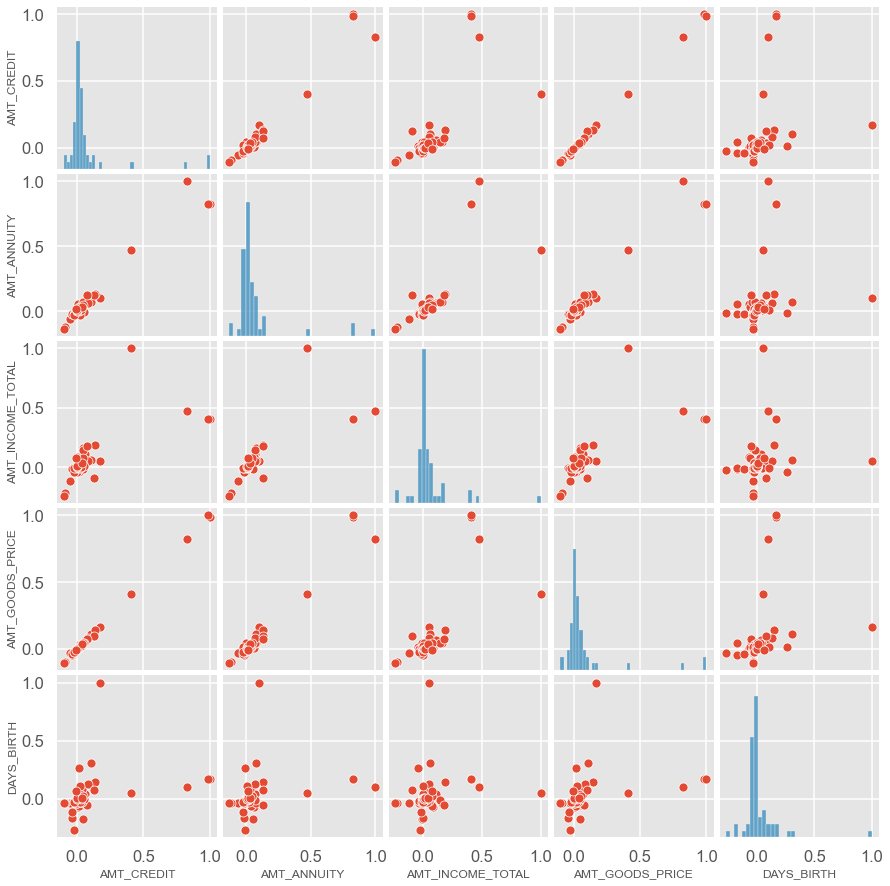

In [108]:
#-- Plotting the relation between correlated highly corelated numeric vriables for Non-Defaulters --

plt.figure(figsize=[20,8])
sns.pairplot(app_data_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0))
plt.show()

<Figure size 1440x576 with 0 Axes>

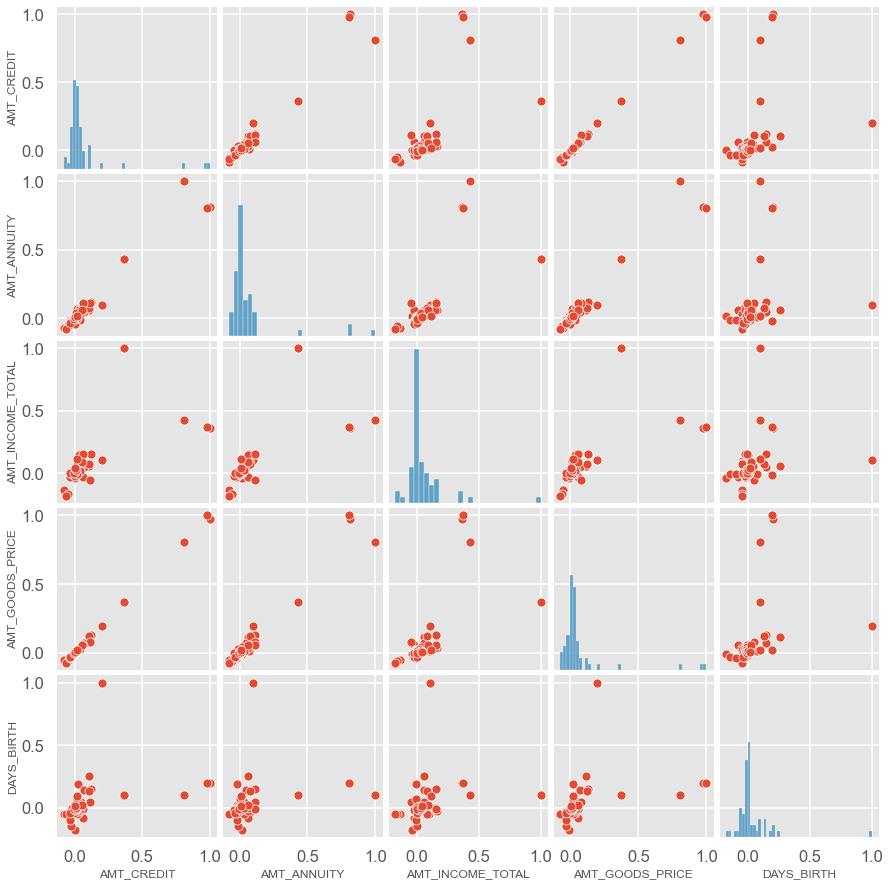

In [109]:
#-- Plotting the relation between correlated highly corelated numeric vriables for Defaulters --

plt.figure(figsize=[20,8])
sns.pairplot(app_data_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0))
plt.show()

### 5.6 Univariate Analysis on previous application data

#### 5.6.1 Contract Status

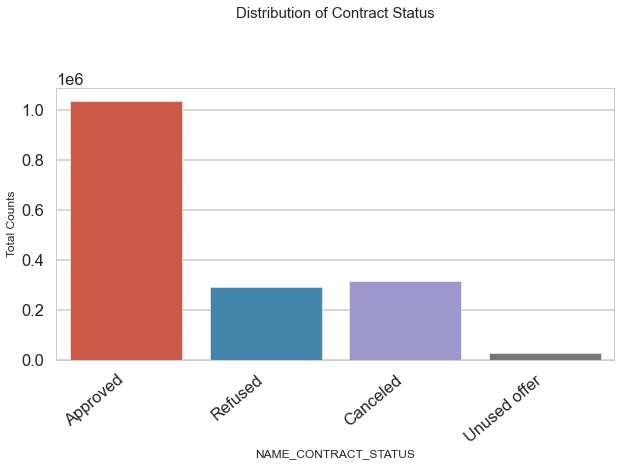

In [110]:
#-- Contract status of previous application --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(10,5))
    
sns.countplot(x='NAME_CONTRACT_STATUS', data=pre_app_data,ax=ax)
ax.set_ylabel('Total Counts')
ax.set_title(f'Distribution of Contract Status',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
plt.show()

We see that majority of loans are approved and very less percentage of loans are unused offer

#### 5.6.2 Contract Type

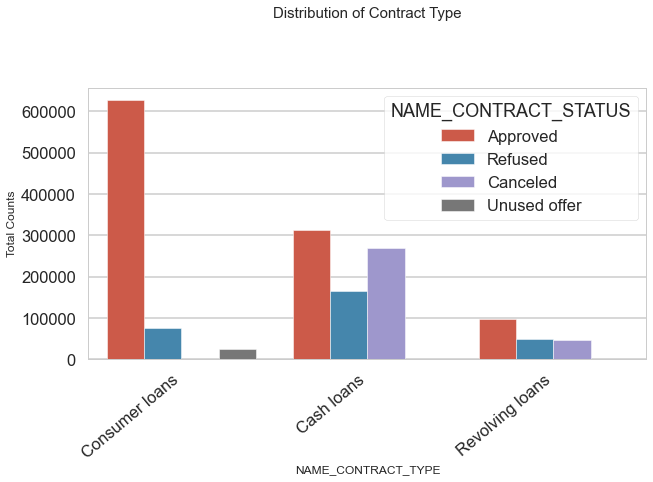

In [111]:
#-- Contract type of previous application --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(10,5))
    
sns.countplot(x='NAME_CONTRACT_TYPE', data=pre_app_data,ax=ax,hue='NAME_CONTRACT_STATUS')
ax.set_ylabel('Total Counts')
ax.set_title(f'Distribution of Contract Type',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
plt.show()

Most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than others.

#### 5.6.3 Day of the week

In [112]:
#-- On which day clients applied for loan in previous data and their counts --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(10,5))
    
sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=pre_app_data,ax=ax)
ax.set_ylabel('Counts')
ax.set_title(f'On which day clients applied for loan in previous data and their counts',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
plt.show()

We see that less number of applicants that come in the weekends

#### 5.6.4 Payment Method

In [113]:
#-- Payment method that client choose to pay for the previous application --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(10,5))
    
sns.countplot(x='NAME_PAYMENT_TYPE', data=pre_app_data,ax=ax)
ax.set_ylabel('Counts')
ax.set_title(f'Payment method that client choose to pay for the previous application',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
plt.show()

Most of the clients choe to pay cash through bank.

#### 5.6.5 Client Type

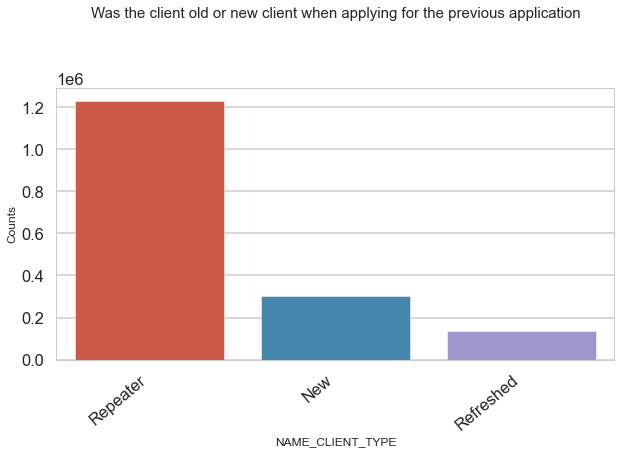

In [114]:
#-- Was the client old or new client when applying for the previous application --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(10,5))
    
sns.countplot(x='NAME_CLIENT_TYPE', data=pre_app_data,ax=ax)
ax.set_ylabel('Counts')
ax.set_title(f'Was the client old or new client when applying for the previous application',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
plt.show()

We see that majority of the clients are repeters.

#### 5.6.6 Reasons of previous application rejection

In [115]:
#-- Reasons of previous application rejection --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(10,5))
    
sns.countplot(x='CODE_REJECT_REASON', data=pre_app_data,ax=ax)
ax.set_ylabel('Counts')
ax.set_title(f'Reasons of previous application rejection',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
plt.show()

We see that HC is the reason majority of applications got rejetced.

#### 5.6.7 Type of goods

In [116]:
#-- What kind of goods did the client apply for in the previous application --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(20,5))
    
sns.countplot(x='NAME_GOODS_CATEGORY', data=pre_app_data,ax=ax)
ax.set_ylabel('Counts')
ax.set_title(f'What kind of goods did the client apply for in the previous application',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
plt.show()

We see that the majority of loans are for mobiles, consumer electronics, computers and furnitures.

#### 5.6.8 Was the previous application for CASH, POS, CAR, CARDS

In [117]:
#-- Was the previous application for CASH, POS, CAR, CARDS --

plt.style.use('ggplot')
sns.despine
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(10,5))
    
sns.countplot(x='NAME_PORTFOLIO', data=pre_app_data,ax=ax)
ax.set_ylabel('Counts')
ax.set_title(f'Was the previous application for CASH, POS, CAR, CARDS',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
plt.show()

We see that majority of previous application is for POS and a good amount of it is for cash.

### 5.7 Bivariate analysis of numerical columns

<Figure size 1440x576 with 0 Axes>

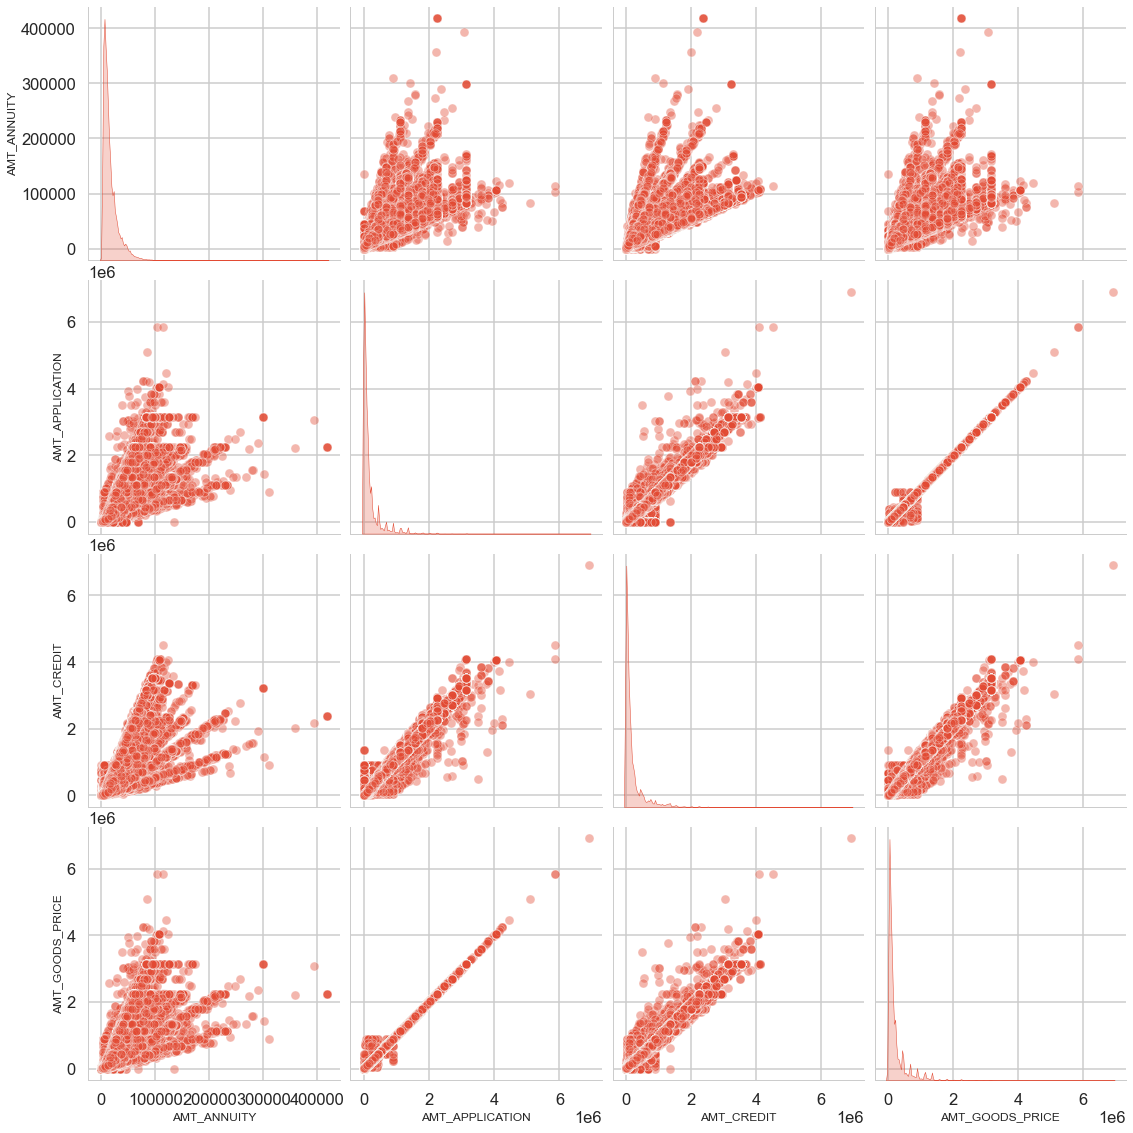

In [118]:
#-- Plotting the relation between correlated highly corelated numeric vriables --
plt.figure(figsize=[20,8])
sns.pairplot(pre_app_data[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80},
             size = 4)
plt.show()

In [119]:
# -- By-varient analysis of Contract status and Final credit amount disbursed to the customer previously, after approval --


plt.style.use('ggplot')
sns.despine
fig,ax = plt.subplots(1,1,figsize=(15,8))
    
sns.boxenplot(x='NAME_CONTRACT_STATUS',y ='AMT_CREDIT' , data=pre_app_data)
ax.set_ylabel(f'AMT_CREDIT')
ax.set_xlabel(f'NAME_CONTRACT_STATUS')

ax.set_title(f'NAME_CONTRACT_STATUS Vs AMT_CREDIT',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
     
plt.show()

We see that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

In [120]:
# -- By-varient analysis of Contract status and Annuity of previous appliction --

plt.style.use('ggplot')
sns.despine
fig,ax = plt.subplots(1,1,figsize=(15,8))
    
sns.boxenplot(x='NAME_CONTRACT_STATUS',y ='AMT_ANNUITY' , data=pre_app_data)
ax.set_ylabel(f'AMT_ANNUITY')
ax.set_xlabel(f'NAME_CONTRACT_STATUS')

ax.set_title(f'NAME_CONTRACT_STATUS Vs AMT_ANNUITY',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
     
plt.show()

We see that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time.
We also see that applications with too high AMT ANNUITY also got refused more often than others.

## ---- End ----
#### EDA Case Study - DS - C33 [2021]